In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [2]:
import os
import pandas as pd

# Get the current working directory
cwd = os.getcwd()

# Define the file path
file_path = os.path.join(cwd, "C:/Users/Admin/Downloads/cleaned-BA-reviews.csv")

# Load the data
df = pd.read_csv(file_path, index_col=0)

# Reset index to ensure index are in order
df.reset_index(drop=True, inplace=True)


In [10]:
df.head()

,reviews,stars,date,country,verified
0,check fast friendly security breeze lounge bus...,5,2024-04-03,United Kingdom,True
1,first time seen new club world suite seat comf...,7,2024-04-02,United Kingdom,True
2,flew business class doha london st march servi...,3,2024-04-02,United Kingdom,True
3,starting heathrow terminal check fairly easy f...,4,2024-03-28,United Kingdom,True
4,verified flown route easyjet regularly twenty ...,8,2024-03-28,United Kingdom,False


# Analysing Star rating

Analysing the count for each rating

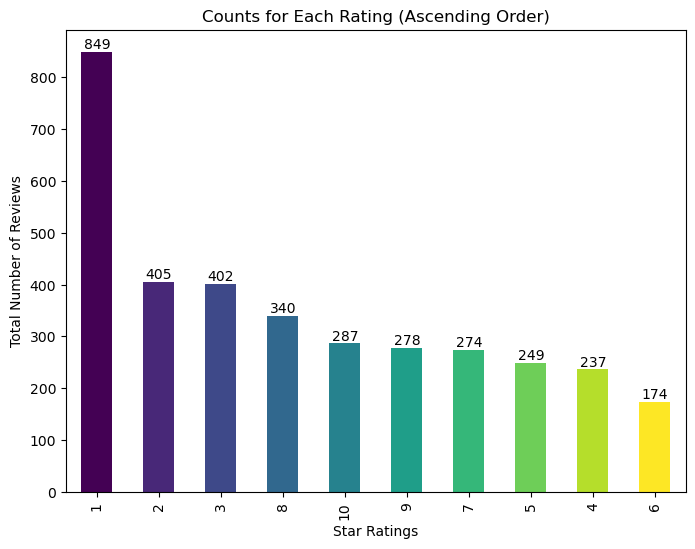

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Sorting the ratings in ascending order
rating_sorted = df['stars'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(rating_sorted)))

# Plotting the bar chart with fading colors and ascending order
plt.figure(figsize=(8, 6))
bars = rating_sorted.plot(kind="bar", color=colors)

# Adding count labels to the bars
for bar, count in zip(bars.patches, rating_sorted.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom')

plt.xlabel("Star Ratings")
plt.ylabel("Total Number of Reviews")
plt.title("Counts for Each Rating (Ascending Order)")
plt.show()


Mean star rating

In [19]:
df.stars.mean()

4.610014306151645

# Average rating for each country

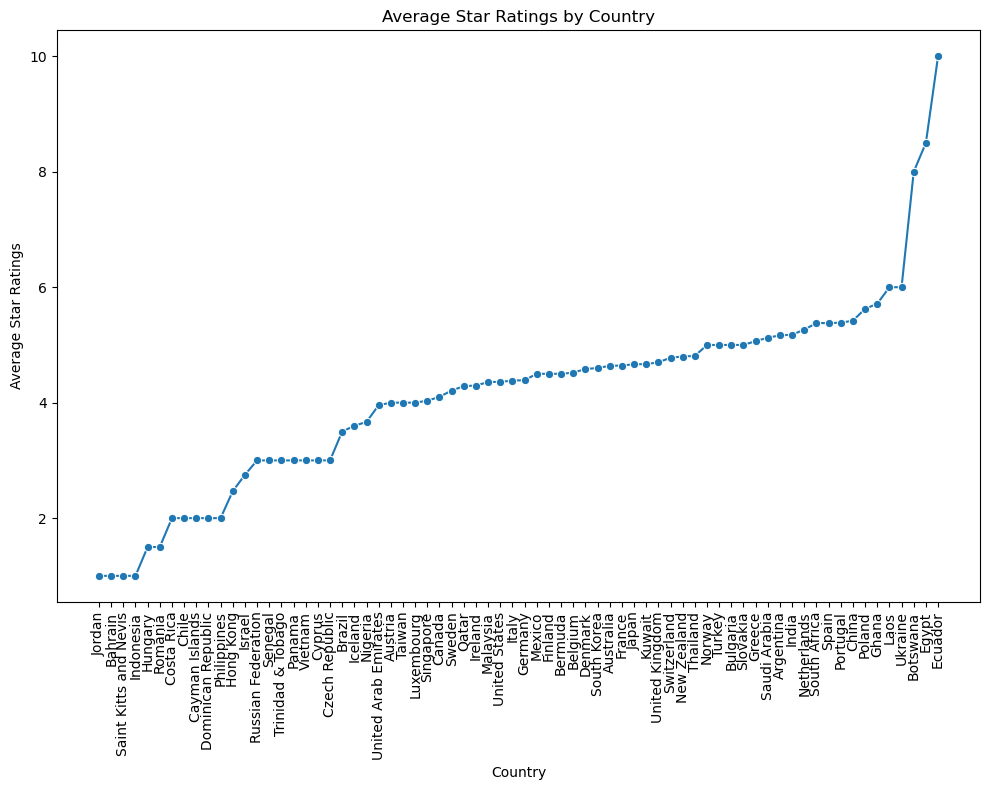

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average star rating for each country
average_ratings = df.groupby('country')['stars'].mean().reset_index()

# Sort the DataFrame by average star rating
average_ratings_sorted = average_ratings.sort_values(by='stars')

# Plot the line chart
plt.figure(figsize=(10, 8))
sns.lineplot(data=average_ratings_sorted, x='country', y='stars', marker='o')
plt.title('Average Star Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Average Star Ratings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()


Top ten review count for country

C:\Users\Admin\AppData\Local\Temp\ipykernel_9320\778152439.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_countries.index, rotation=45, ha='right')


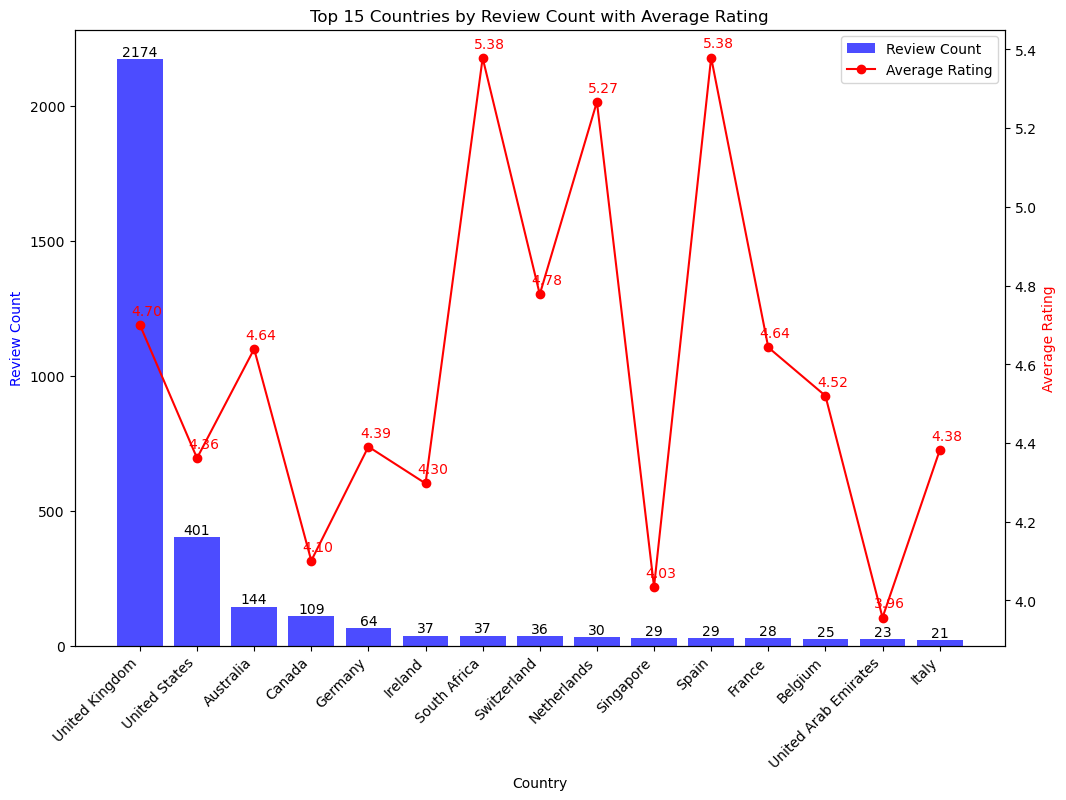

In [31]:
import matplotlib.pyplot as plt

# Calculate the review count and average rating for each country
country_stats = df.groupby('country').agg({'stars': ['mean', 'count']})
country_stats.columns = country_stats.columns.droplevel()

# Select the top 15 countries with the highest review counts
top_countries = country_stats.nlargest(15, 'count')

# Plot the bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot review count
bars = ax1.bar(top_countries.index, top_countries['count'], color='b', alpha=0.7, label='Review Count')

# Create a second y-axis to plot average rating
ax2 = ax1.twinx()
line = ax2.plot(top_countries.index, top_countries['mean'], color='r', marker='o', label='Average Rating')

# Set labels and title
ax1.set_xlabel('Country')
ax1.set_ylabel('Review Count', color='b')
ax2.set_ylabel('Average Rating', color='r')
plt.title('Top 15 Countries by Review Count with Average Rating')

# Rotate x-axis labels diagonally for better readability
ax1.set_xticklabels(top_countries.index, rotation=45, ha='right')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Add count labels to the bars
for bar, count in zip(bars, top_countries['count']):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom')

# Add average rating labels to the line
for i, txt in enumerate(top_countries['mean']):
    ax2.annotate(f'{txt:.2f}', (top_countries.index[i], top_countries['mean'].iloc[i]),
                 xytext=(5, 5), textcoords='offset points', ha='center', va='bottom', color='r')

plt.show()


# Time series analysis of ratings


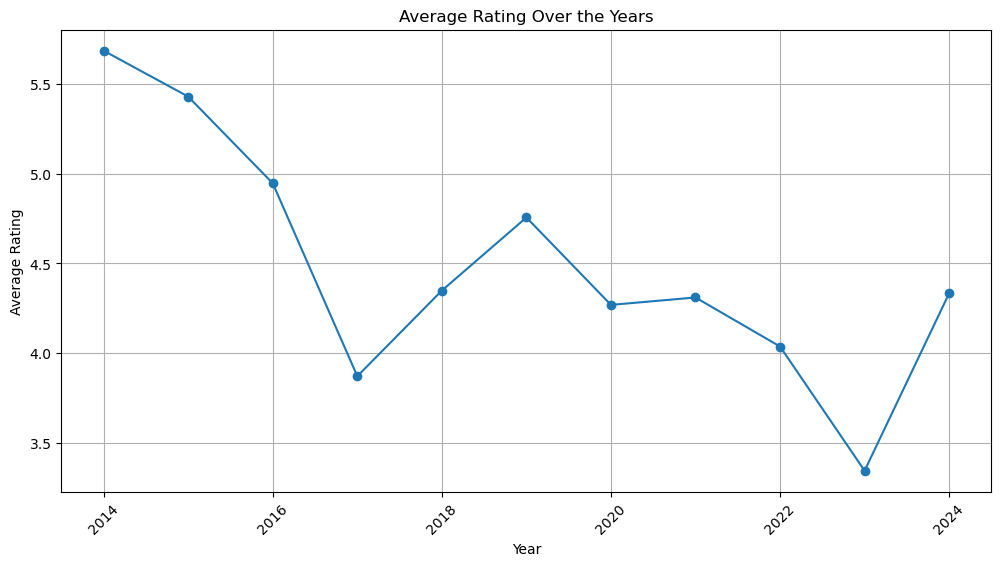

In [33]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group the data by year and calculate the average rating for each year
average_rating_per_year = df.groupby(df['year'])['stars'].mean()

# Plot the time series
plt.figure(figsize=(12, 6))
average_rating_per_year.plot(marker='o', linestyle='-')
plt.title('Average Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



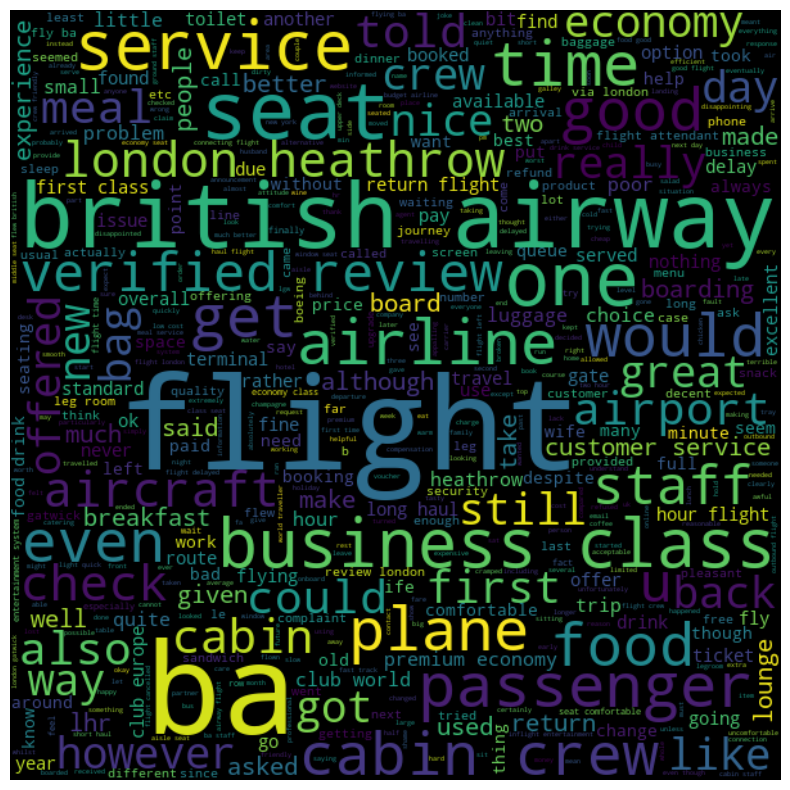

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Combine all reviews into a single string
reviews_combined = " ".join(df['reviews'])

# Set stopwords
stop_words = set(stopwords.words('english'))

# Create WordCloud object
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stop_words).generate(reviews_combined)

# Plot WordCloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


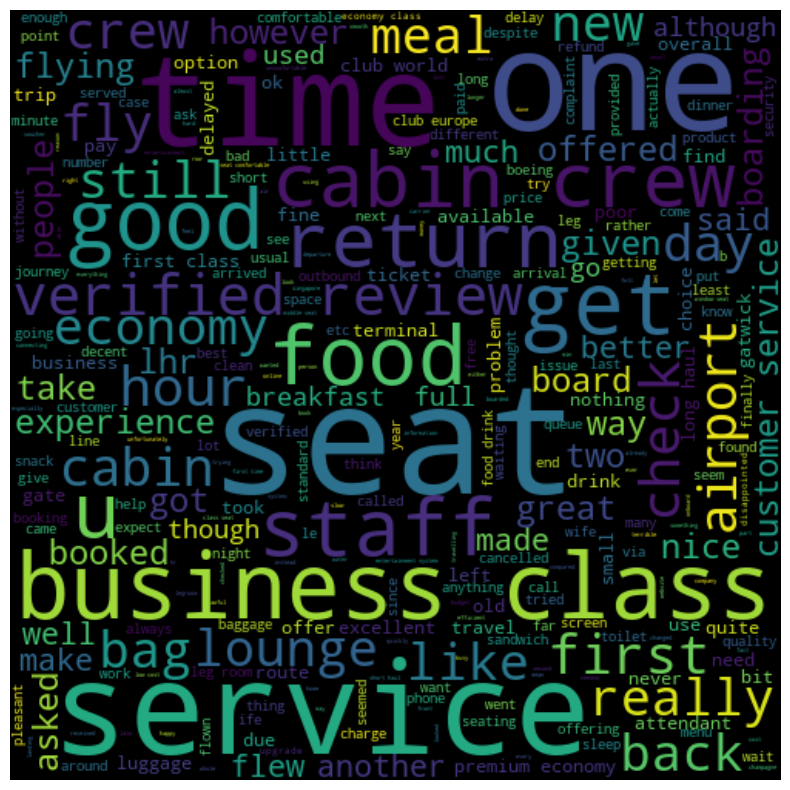

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Combine all reviews into a single string
reviews_combined = " ".join(df['reviews'])

# Define custom stopwords
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(["ba", "flight", "british", "airway", "airline", "plane", "told", "also", "passenger",
                         "london", "heathrow", "aircraft", "could", "even", "would"])

# Create WordCloud object with custom stopwords
wordcloud = WordCloud(height=500, width=500, max_font_size=100, max_words=300, stopwords=custom_stopwords).generate(reviews_combined)

# Plot WordCloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


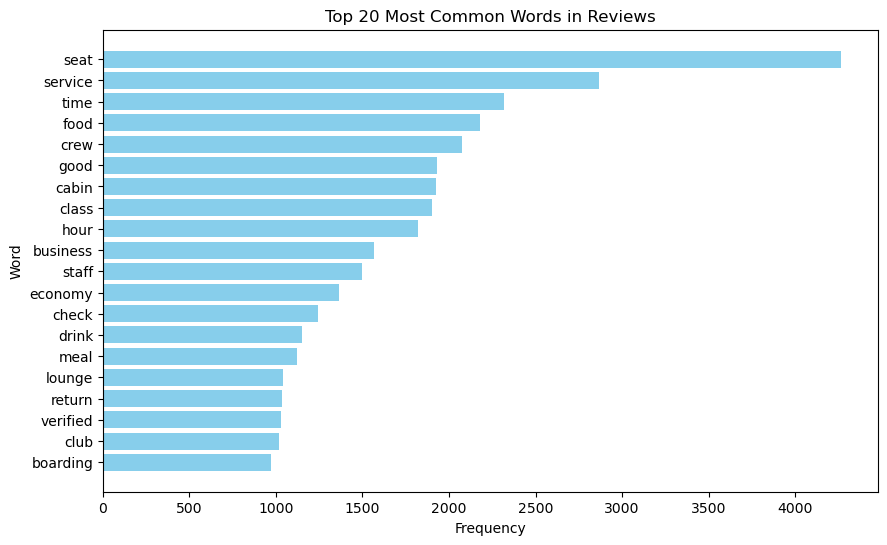

In [56]:
from nltk.probability import FreqDist
import pandas as pd
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt

# Split the text of all reviews into a list of words
words = reviews.split(" ")

# Define stopwords
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger", "u", "london", "airway", "british", "airline",
                                           "heathrow", "plane", "lhr", "review"])

# Remove stopwords
new_words = [word for word in words if word not in stopwords]

# Calculate frequency distribution of words
nlp_words = FreqDist(new_words).most_common(20)

# Create a DataFrame of these words and their frequencies
all_fdist = pd.DataFrame(nlp_words, columns=['Word', 'Frequency'])

# Plot the word frequencies
plt.figure(figsize=(10, 6))
plt.barh(all_fdist['Word'], all_fdist['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Common Words in Reviews')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common words at the top
plt.show()


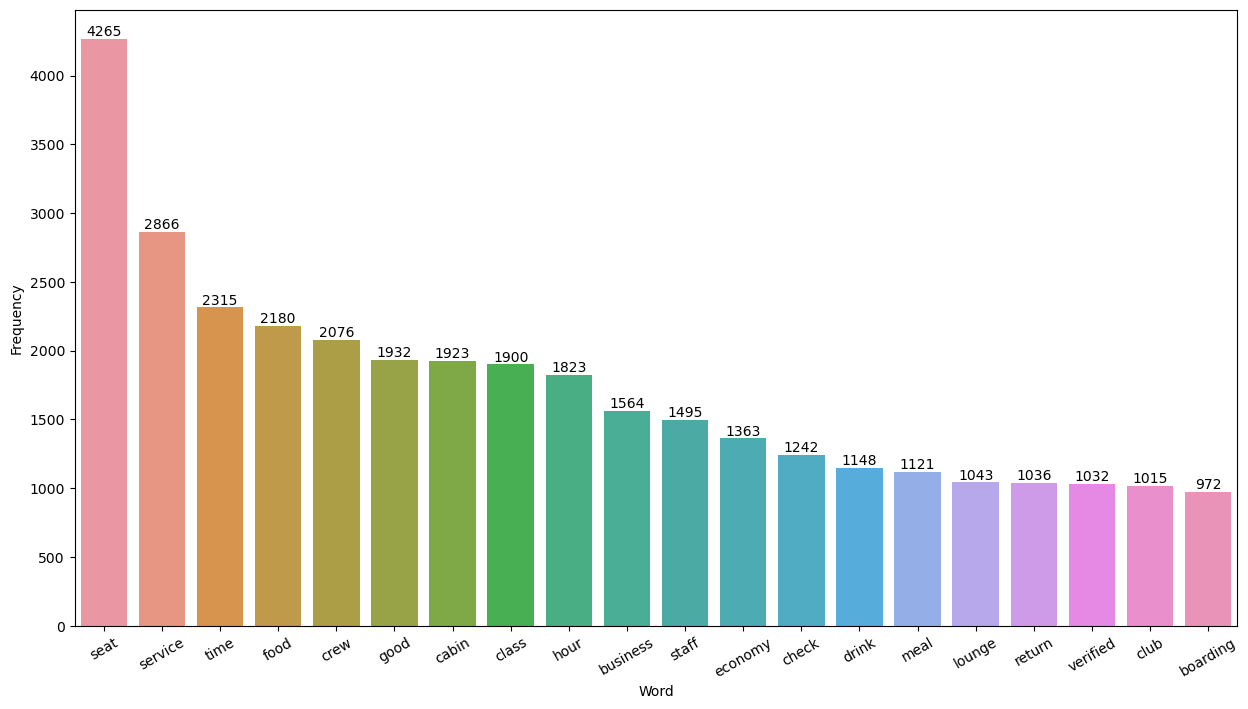

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting figure and ax into variables
fig, ax = plt.subplots(figsize=(15, 8))

# Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist['Word'], y=all_fdist['Frequency'], ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

# Show plot
plt.show()


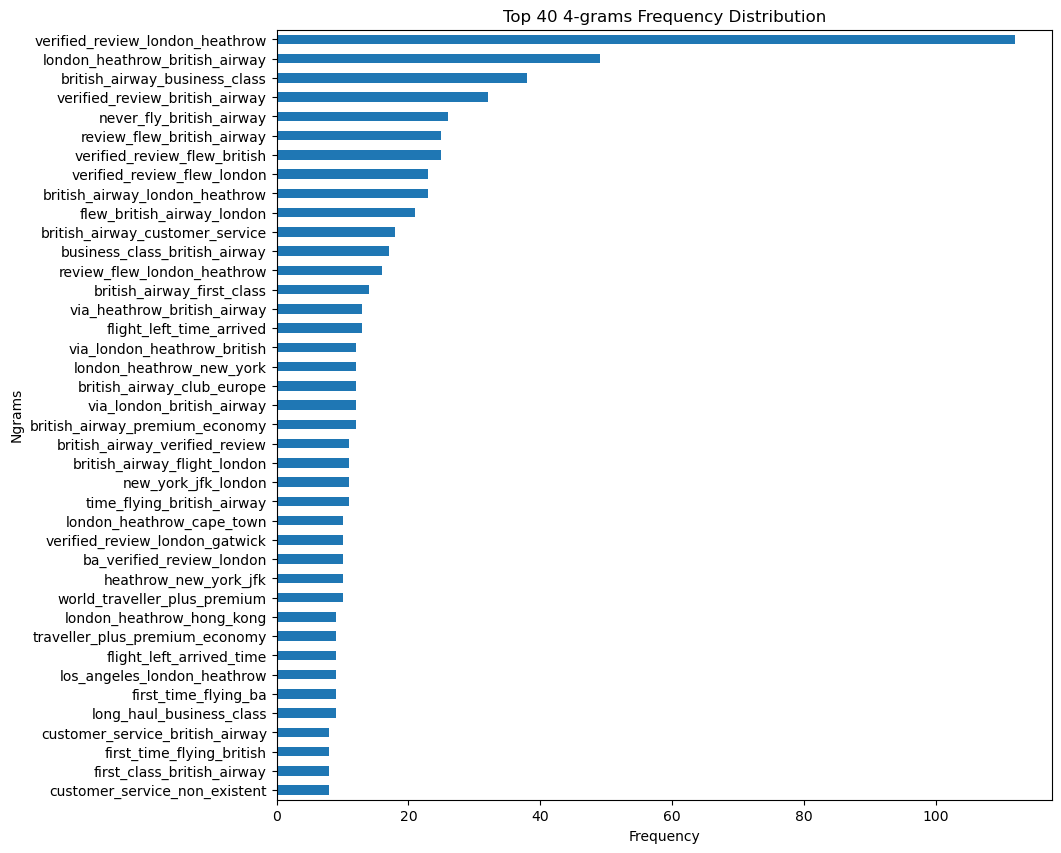

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk import ngrams
from nltk.probability import FreqDist

def get_freq_dist(text, number_of_ngrams):
    # Generate ngrams
    ngrams_list = list(ngrams(text.split(), number_of_ngrams))
    
    # Create FreqDist
    ngram_fd = FreqDist(ngrams_list).most_common(40)
    
    # Sort values by highest frequency
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1])}
    
    # Join ngram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k): v for k, v in sorted(ngram_fd, key=lambda item: item[1])}
    
    # Convert to Pandas Series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    
    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind="barh")
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Ngrams')
    ax.set_title(f'Top 40 {number_of_ngrams}-grams Frequency Distribution')
    plt.show()

# Call the function with the specified arguments
get_freq_dist(reviews, 4)


<Axes: >

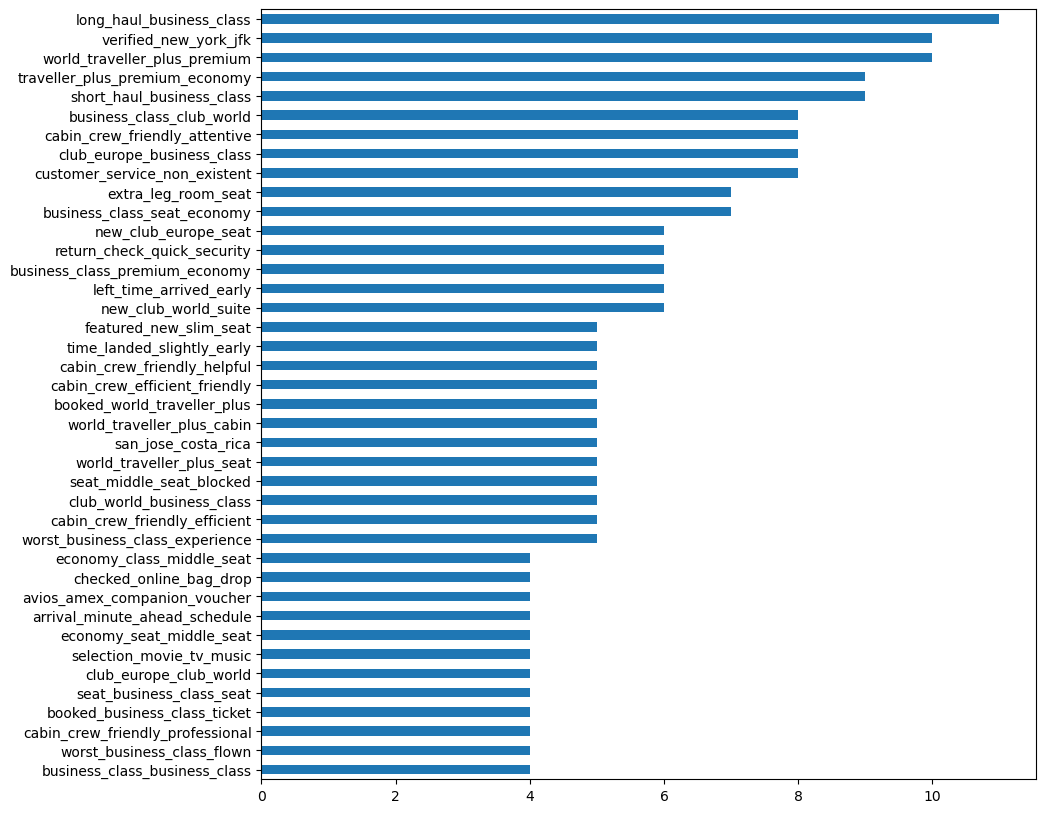

In [52]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.reviews)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

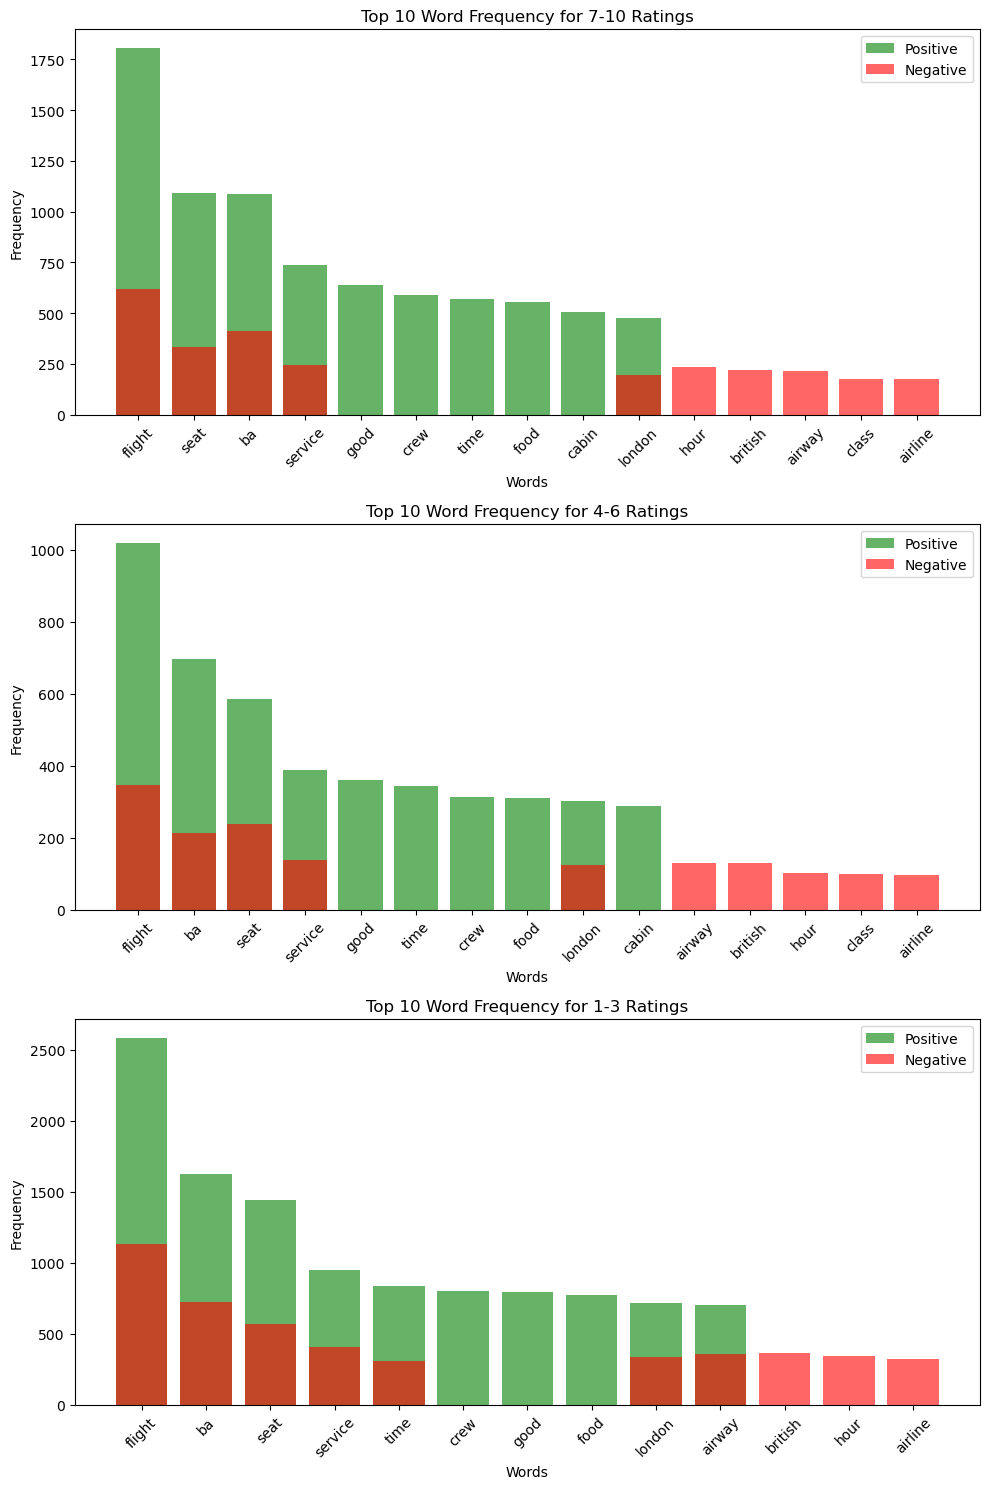

In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Function to perform sentiment analysis and extract key topics
def analyze_reviews(reviews):
    positive_words = []
    negative_words = []
    for review in reviews:
        blob = TextBlob(review)
        polarity = blob.sentiment.polarity
        # Separate words from each review
        words = blob.words
        if polarity > 0:
            positive_words.extend(words)
        elif polarity < 0:
            negative_words.extend(words)
    return positive_words, negative_words

# Divide reviews into different rating classes
ratings_classes = {
    '7-10': df[df['stars'].between(7, 10)],
    '4-6': df[df['stars'].between(4, 6)],
    '1-3': df[df['stars'].between(1, 3)]
}

# Initialize subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Analyze reviews for each rating class and count word frequency
word_freq = {}
for i, (rating_class, reviews_df) in enumerate(ratings_classes.items()):
    positive_reviews, negative_reviews = analyze_reviews(reviews_df['reviews'])
    positive_freq = pd.Series(positive_reviews).value_counts()
    negative_freq = pd.Series(negative_reviews).value_counts()
    word_freq[rating_class] = {'positive': positive_freq, 'negative': negative_freq}

    # Plot word frequency for each rating class
    ax = axes[i]
    ax.bar(positive_freq.head(10).index, positive_freq.head(10).values, color='green', alpha=0.6, label='Positive')
    ax.bar(negative_freq.head(10).index, negative_freq.head(10).values, color='red', alpha=0.6, label='Negative')
    ax.set_title(f"Top 10 Word Frequency for {rating_class} Ratings")
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [9]:
from collections import Counter

# Function to analyze sentiment and extract key topics
def analyze_sentiment_and_topics(reviews):
    topics = []
    for review in reviews:
        blob = TextBlob(review)
        polarity = blob.sentiment.polarity
        if polarity > 0.2:  # Positive polarity threshold
            topics.extend([sentence.raw for sentence in blob.sentences])
        elif polarity < -0.2:  # Negative polarity threshold
            topics.extend([sentence.raw for sentence in blob.sentences])
    return topics

# Analyze reviews for each rating class
rating_classes = {
    '7-10': df[df['stars'].between(7, 10)]['reviews'],
    '4-6': df[df['stars'].between(4, 6)]['reviews'],
    '1-3': df[df['stars'].between(1, 3)]['reviews']
}

# Dictionary to store results
results = {}

# Iterate over each rating class
for rating_class, reviews in rating_classes.items():
    topics = analyze_sentiment_and_topics(reviews)
    
    # Count the frequency of each topic
    topic_counts = Counter(topics)
    
    # Select the top N most frequent topics
    top_topics = topic_counts.most_common(3)  # Adjust N as needed
    
    # Store results
    results[rating_class] = top_topics

# Print results
for rating_class, top_topics in results.items():
    print(f"{rating_class} ratings:")
    for topic, count in top_topics:
        print(f"- {topic} (Frequency: {count})")
    print()


7-10 ratings:
- verified efficient smooth flight start finish cabin crew attentive bubbly clean aircraft mcvities snack nice touch even coffee bag unexpectedly nice everything praise nothing complain (Frequency: 1)
- waited hour check paphos business check staff utterly incompetent flight crew business class removed ruck sack flight bin without consent make way another customer luggage coerced luggage foot throughout flight utterly outrageous last thing would expect ba business class (Frequency: 1)
- boarding started delay minute everybody could see member team arrive en minute announced boarding time wait outside nearly minute hot unfortunately flying barbados london club class underwhelming experience ba performing great performance international flight anymore lucky new configuration welcome aboard champagne fruit juice glass filled level one inch far cheaper brand champagne heidsieck monopole ro champagne available wine also poor french wine cognac also available anymore meal sub p